## note: should be run with python3.6 to be able to use MTK library

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import MisrToolkit as mtk # needs python3.6
# from mpl_toolkits.basemap import Basemap # needs python 3.8?
import sys # to check python version
import os

In [47]:
# check python version
sys.version

'3.6.13 |Anaconda, Inc.| (default, Feb 23 2021, 12:58:59) \n[GCC Clang 10.0.0 ]'

In [18]:
# load dataset
ds_fp = "/Users/ehsanmos/Documents/RnD/MISR_lab/ML_research/training_dataset/merged_april_2016_9cam3bands.csv"
in_ds = pd.read_csv(ds_fp)

In [19]:
in_ds.head(5)

,path,orbit,block,line,sample,lat,lon,Da_r,Ca_r,Ba_r,Aa_r,An_r,An_g,An_b,An_nir,Af_r,Bf_r,Cf_r,Df_r,mean_ATM_roughness
0,90,86889,16,486,1442,80.160977,273.228372,0.85695,0.78779,0.73731,0.70870,0.69518,0.63135,0.78420,0.69518,0.81045,0.97341,1.23217,-1.0,8.08
1,90,86889,16,487,1442,80.160990,273.224935,0.85457,0.78700,0.73612,0.70591,0.69359,0.63294,0.78221,0.69359,0.81045,0.97222,1.23455,-1.0,8.01
2,90,86889,16,486,1442,80.160978,273.228178,0.85695,0.78779,0.73731,0.70870,0.69518,0.63135,0.78420,0.69518,0.81045,0.97341,1.23217,-1.0,8.06
3,90,86889,16,486,1442,80.161238,273.231860,0.85695,0.78779,0.73731,0.70870,0.69518,0.63135,0.78420,0.69518,0.81045,0.97341,1.23217,-1.0,5.92
4,90,86889,16,486,1442,80.161251,273.228426,0.85695,0.78779,0.73731,0.70870,0.69518,0.63135,0.78420,0.69518,0.81045,0.97341,1.23217,-1.0,6.53


In [20]:
in_ds.shape

(2924046, 20)

In [21]:
ds_3cam = in_ds[["lat", "lon", "Ca_r", "Cf_r", "An_r", "mean_ATM_roughness"]]


In [22]:
ds_3cam.rename(columns={"mean_ATM_roughness":"rms"}, inplace=True)
# ds_3cam["mean_ATM_roughness"]="rms" # does not work- should use DF.rename()
ds_3cam.columns

/Applications/anaconda3/envs/virtEnv36/lib/python3.6/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Index(['lat', 'lon', 'Ca_r', 'Cf_r', 'An_r', 'rms'], dtype='object')

In [23]:
# determine range to print based on min, max lat and lon of the data
# is it necessary?
xlon = ds_3cam['lon']
ylat = ds_3cam['lat']


margin = 2 # buffer to add to the range
lat_min = min(ylat) - margin
lat_max = max(ylat) + margin
lon_min = min(xlon) - margin
lon_max = max(xlon) + margin

In [24]:
print(lat_min)
print(lat_max)
print(lon_min)
print(lon_max)

-2.0
86.250712
-2.0
303.192293


In [25]:
from itertools import chain

def draw_map(m, scale=0.2):
    # draw a shaded-relief image
    m.shadedrelief(scale=scale)
    
    # lats and longs are returned as a dictionary
    lats = m.drawparallels(np.linspace(-90, 90, num=7))
    lons = m.drawmeridians(np.linspace(-180, 180, num=18))

    # keys contain the plt.Line2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    
    # cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')

In [26]:
# ref: https://stackoverflow.com/questions/44488167/plotting-lat-long-points-using-basemap
# basemap = Basemap(llcrnrlon=lon_min,
#                     llcrnrlat=lat_min,
#                     urcrnrlon=lon_max,
#                     urcrnrlat=lat_max,
#                     lat_0=(lat_max - lat_min)/2,
#                     lon_0=(lon_max-lon_min)/2,
#                     projection='ortho',
#                     resolution = None,
#                     area_thresh=10000.,)

In [27]:
# basemap.shadedrelief()
# basemap.drawcoastlines(color='gray')
# basemap.drawcountries(color='gray')
# basemap.drawstates(color='gray')



# basemap.drawcoastlines()
# basemap.drawcountries()
# basemap.drawstates()
# basemap.drawmapboundary(fill_color='#46bcec')
# basemap.fillcontinents(color = 'white',lake_color='#46bcec')

In [28]:
# fig = plt.figure(figsize=(12, 12))

# basemap = Basemap(projection='ortho', resolution=None, lat_0=90, lon_0=180)

# # locations on map: convert lat and lon to map projection coordinates
# xlons, ylats = basemap(xlon, ylat)

# plt.plot(xlons, ylats, 'ok', markersize=1)

# # draw a circle on map on 60N  
# basemap.drawparallels([60], color='red') #, labels='test'????)
# plt.title('Study Region, 60N', fontsize=16)

# draw_map(basemap);

# how zoom to the region?

In [29]:
def make_the_map(XlonSet, YlatSet):
    
    fig = plt.figure(figsize=(12, 12))

    basemap = Basemap(projection='ortho', resolution=None, lat_0=90, lon_0=180)

    # locations on map: convert lat and lon to map projection coordinates
    xlons, ylats = basemap(XlonSet, YlatSet)

    plt.plot(xlons, ylats, 'ok', markersize=1)

    # draw a circle on map on 60N  
    basemap.drawparallels([60], color='red') #, labels='test'????)
    plt.title('Study Region, 60N', fontsize=16)

    draw_map(basemap);
    return 0;

In [31]:
# run with oython>=3.8
# make_the_map(xlon, ylat)

In [32]:
# extract transect
transect = ds_3cam.loc[(ds_3cam['lon']>230.0) & (ds_3cam['lon']<231.0)]
transect

,lat,lon,Ca_r,Cf_r,An_r,rms
1589285,76.235487,230.712293,0.66574,1.03182,0.53599,15.24
1589286,76.235648,230.710186,0.66574,1.03182,0.53599,22.32
1589287,76.235474,230.712462,0.66574,1.03182,0.53599,17.44
1589288,76.235619,230.714797,0.66574,1.03182,0.53599,14.30
1589289,76.235781,230.712690,0.66574,1.03182,0.53599,14.95
...,...,...,...,...,...,...
2099036,76.228999,230.703697,0.87982,1.01992,0.87725,15.14
2099037,76.229147,230.706017,0.87982,1.01992,0.87725,22.31
2099038,76.229308,230.703911,0.87982,1.01992,0.87725,8.06
2099039,76.229469,230.701805,0.87982,1.01992,0.87725,8.52


In [33]:
# create a column as index and set that column as index to plot transect

# lon_subset['index'] = [i for i in range(len(lon_subset['lon']))]
transect.index = range(1,len(transect)+1)
transect

# set that column as index
# lon_subset.set_index['index']

,lat,lon,Ca_r,Cf_r,An_r,rms
1,76.235487,230.712293,0.66574,1.03182,0.53599,15.24
2,76.235648,230.710186,0.66574,1.03182,0.53599,22.32
3,76.235474,230.712462,0.66574,1.03182,0.53599,17.44
4,76.235619,230.714797,0.66574,1.03182,0.53599,14.30
5,76.235781,230.712690,0.66574,1.03182,0.53599,14.95
...,...,...,...,...,...,...
20456,76.228999,230.703697,0.87982,1.01992,0.87725,15.14
20457,76.229147,230.706017,0.87982,1.01992,0.87725,22.31
20458,76.229308,230.703911,0.87982,1.01992,0.87725,8.06
20459,76.229469,230.701805,0.87982,1.01992,0.87725,8.52


In [75]:
# select a smaller subset of transect, like the first 1000 points
transect_small = transect.iloc[0:10]
transect_small

,lat,lon,Ca_r,Cf_r,An_r,rms
1,76.235487,230.712293,0.66574,1.03182,0.53599,15.24
2,76.235648,230.710186,0.66574,1.03182,0.53599,22.32
3,76.235474,230.712462,0.66574,1.03182,0.53599,17.44
4,76.235619,230.714797,0.66574,1.03182,0.53599,14.30
5,76.235781,230.712690,0.66574,1.03182,0.53599,14.95
6,76.235942,230.710583,0.66574,1.03182,0.53599,18.66
7,76.235768,230.712860,0.66574,1.03182,0.53599,18.90
8,76.235913,230.715193,0.66574,1.03182,0.53599,12.64
9,76.236075,230.713087,0.66574,1.03182,0.53599,25.02
10,76.236236,230.710980,0.66574,1.03182,0.53599,17.76


In [76]:
xlon270 = transect_small['lon']
ylat270 = transect_small['lat']

In [77]:
# run with oython>=3.8
# make_the_map(xlon270, ylat270)

# Extract data from MISR-estimated roughness files by using MTK library. Should use python3.6 for this purpose 

## Plot Transect 

<AxesSubplot:>

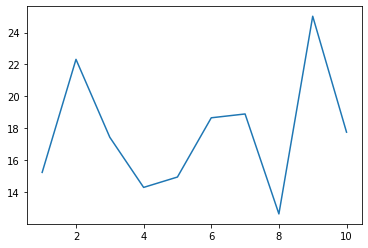

In [78]:
# plot transect
transect_small["rms"].plot(x=transect_small.index)#, y=transect_small)

In [ ]:
roughness_dir = ""

In [83]:
# extract MISR-estimated roughness for the same latLon locations and plot them together with ATM
transect_from_misr = []
for irow in range(transect_small.shape[0]): # each row==LatLon might fall in several blocks==POB, we open each block and will average all at the end
    
    print("DF row: %s" %irow)
    lat_lon = transect_small[['lat','lon']].iloc[irow]
    print(lat_lon)
    
    path_list = mtk.latlon_to_path_list(lat_lon[0], lat_lon[1])
    print(path_list)
    
    roughness_per_pixel_list = []
    for path in path_list:
        # Q- now that we have found many paths, how fogure out to select which path?
        bls = mtk.latlon_to_bls(path, 275 , lat_lon[0], lat_lon[1])
        print(bls)
        
        # use P and B to find roughness file, open it, and extract value for LS, append it to a list, and maybe finally append the list to DF as the last column
        if len(path) < 3:
            print(path)
            path = path.zfill(3)
            print(path)
        roughness_filepattern = "roughness_toa_refl_P"+path+"_*"+"_B0"+bls[0]+".dat"
        print(roughness_filepattern)
        rough_file_fp = os.path.join(roughness_dir, roughness_filepattern)
        print(rough_file_fp)
        if (os.path.isfile(rough_file_fp) == False):
            print("roughness file not found- continue to next path")
        # open roughness file and read pixel value- chat binary format to 2D array and read pixel value
        rough_2d_arr = np.fromfile(rough_file_fp, dtype=np.double).reshape((512,-1))
        print(rough_2d_arr.shape)
        roughness_value = rough_2d_arr[bls[1], bls[2]]
        roughness_per_pixel_list.append(roughness_value)
    
    print(roughness_per_pixel_list)
    mean_roughness_per_pixel = sum(roughness_per_pixel_list)/len(roughness_per_pixel_list)
    
    transect_from_misr.append(mean_roughness_per_pixel)
    
        


DF row: 0
lat     76.235487
lon    230.712293
Name: 1, dtype: float64
[62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148]
(29, 264.625, 9.251968383789062)
(29, 200.7333984375, 144.29833984375)
(29, 133.357421875, 277.6050720214844)
(29, 62.5380859375, 409.0859375)
(28, 500.322265625, 538.6554565429688)
(28, 422.7568359375, 666.2286376953125)
(28, 341.890625, 791.7215576171875)
(28, 257.7744140625, 915.05078125)
(28, 170.4619140625, 1036.1341552734375)
(28, 80.0087890625, 1154.889892578125)
(27, 498.4716796875, 1207.2376708984375)
(27, 401.9091796875, 1321.0977783203125)
(27, 302.384765625, 1432.391845703125)
(27, 199.9599609375, 1541.0426025390625)
(27, 94.7021484375, 1646.9739990234375)
(26, 498.6787109375, 1750.1112060546875)
(26, 387.9599609375, 1850.380859375)
(26, 274.6171875, 1947.7109375)
(26, 158.7255859375, 2042.03125)
(12, 265.89111328125, 2034.149658203125)
(12,

## statistics

In [23]:
transect_small.describe()

,lat,lon,Ca_r,Cf_r,An_r,rms
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,76.271993,230.761643,0.679431,0.883054,0.488551,16.004800
std,0.021084,0.028528,0.080355,0.069747,0.054496,9.021878
min,76.235474,230.710186,0.557620,0.784680,0.403920,5.240000
25%,76.253777,230.737089,0.588510,0.848010,0.430960,9.052500
50%,76.272048,230.761519,0.692000,0.859590,0.518230,13.000000
75%,76.290219,230.786257,0.748380,0.895120,0.535220,20.580000
max,76.308333,230.813485,0.792400,1.031820,0.559930,63.740000


## histogram

<AxesSubplot:>

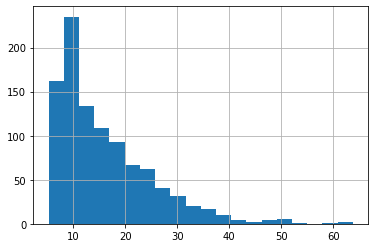

In [24]:
transect_small["rms"].hist(bins=20, alpha=1)